In [7]:
import sagemaker
from sagemaker.pytorch import PyTorch
from sagemaker.tuner import HyperparameterTuner, IntegerParameter, CategoricalParameter, ContinuousParameter
import s3fs

import pandas as pd

import os
import json

In [2]:
sagemaker_session = sagemaker.Session()

bucket = 'animal-reidentification'

role = sagemaker.get_execution_role()

In [3]:
print(bucket, role)
print(os.getcwd())

animal-reidentification arn:aws:iam::974431750608:role/service-role/AmazonSageMaker-ExecutionRole-20210503T160271
/home/ec2-user/SageMaker/animal-reidentification/charles


In [12]:
fs = s3fs.S3FileSystem()

data_key = 'labels.json'
data_location = 's3://{}/{}'.format(bucket, data_key)

with fs.open(data_location, 'r') as label_file:
    labels = json.load(label_file)

In [73]:
name_list = [annot['name'] for annot in labels['annotations']]
name_ser = pd.Series(name_list)
name_counts = name_ser.value_counts()
# Filter for zebras
name_counts = name_counts.loc[name_counts.index.str.startswith('IBEIS_PZ')]

# Print a few of the name counts
name_counts

IBEIS_PZ_1594    28
IBEIS_PZ_1602    24
IBEIS_PZ_1424    22
IBEIS_PZ_1111    22
IBEIS_PZ_1250    22
                 ..
IBEIS_PZ_0534     1
IBEIS_PZ_0642     1
IBEIS_PZ_1716     1
IBEIS_PZ_1853     1
IBEIS_PZ_0533     1
Length: 1905, dtype: int64

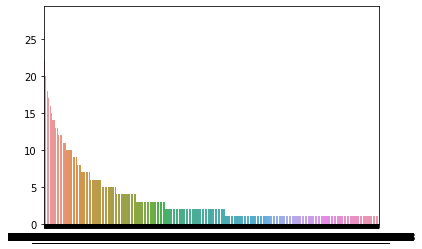

In [74]:
# Plot style 1: x-axis = each individual
ax = sns.barplot(x=name_counts.index, y=name_counts)

Text(0, 0.5, 'count (individuals)')

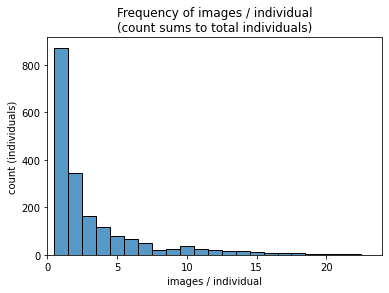

In [77]:
# Plot style 2: x-axis = image count

# Distribution of images per zebra
ax = sns.histplot(name_counts, discrete=True)
ax.set_xlim([0, name_counts.iloc[1]])
ax.set_title('Frequency of images / individual\n(count sums to total individuals)')
ax.set_xlabel('images / individual')
ax.set_ylabel('count (individuals)')